<a href="https://colab.research.google.com/github/Luciebeaulieu/Data_science/blob/main/Lucie_Beaulieu_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
url = "https://docs.google.com/presentation/d/1RSC9fMIi2oTrIE1JiROgKiKkziR8boS1Qnt8-tngv58/edit#slide=id.g1a1a0952122_0_16"

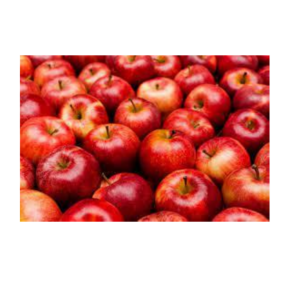

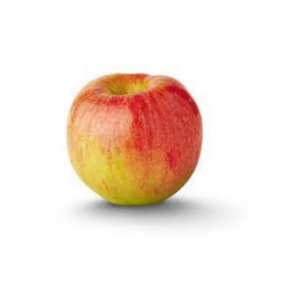

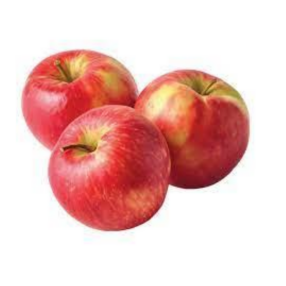

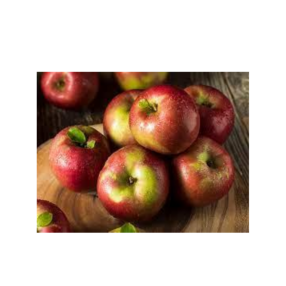

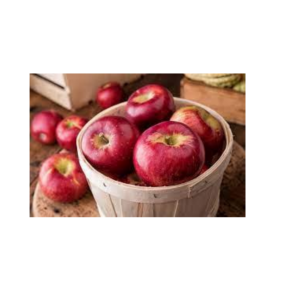

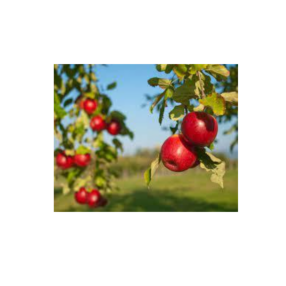

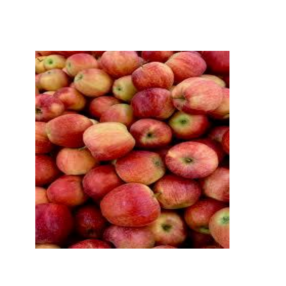

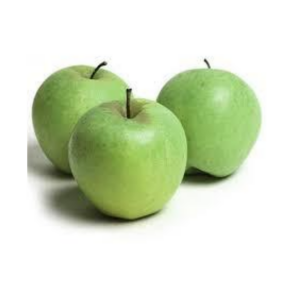

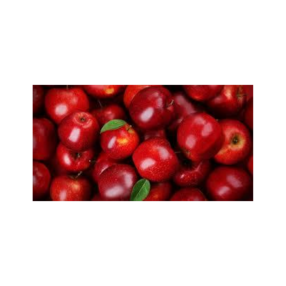

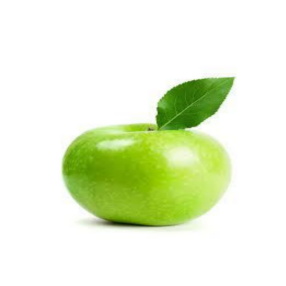

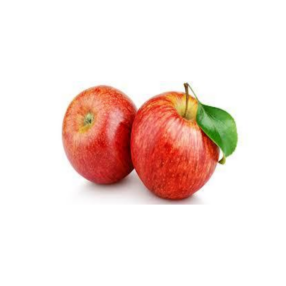

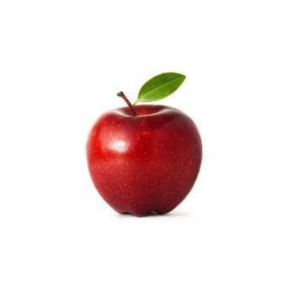

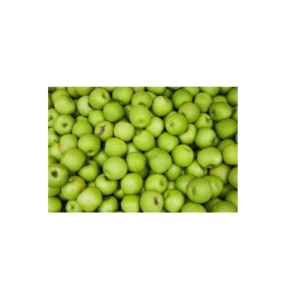

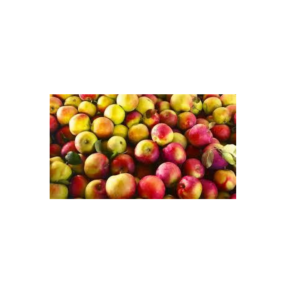

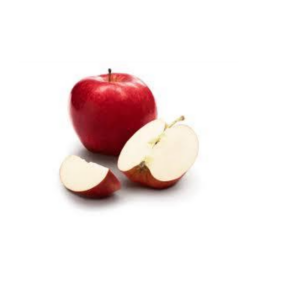

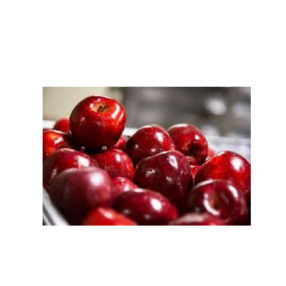

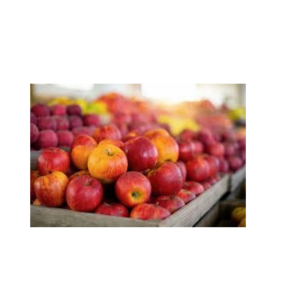

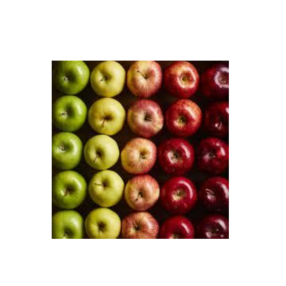

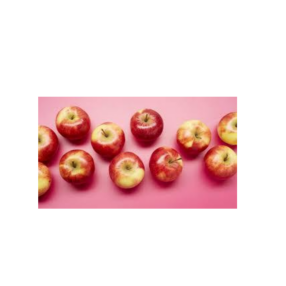

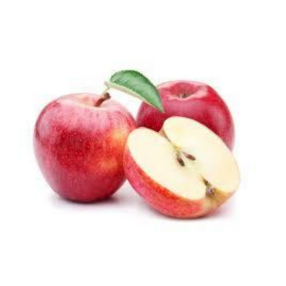

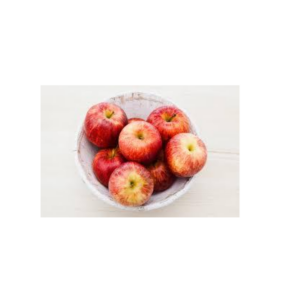

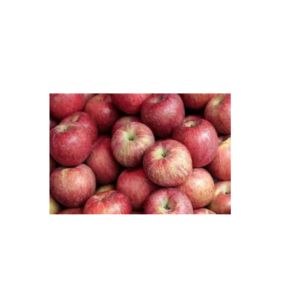

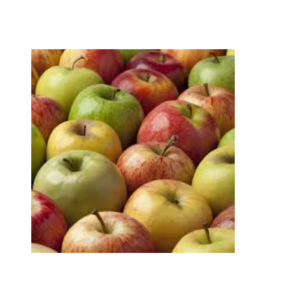

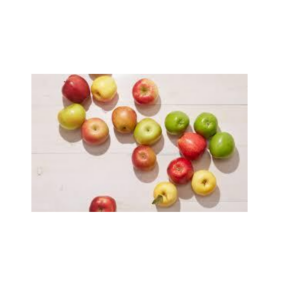

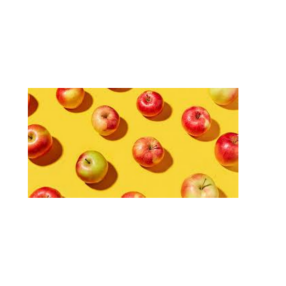

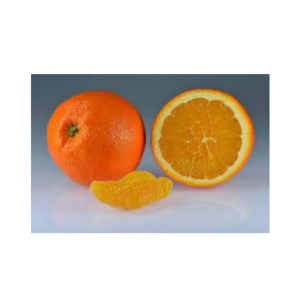

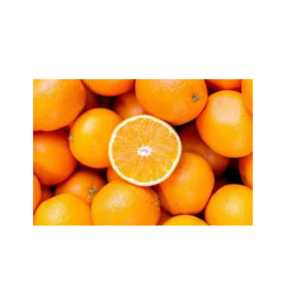

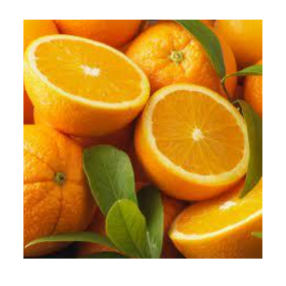

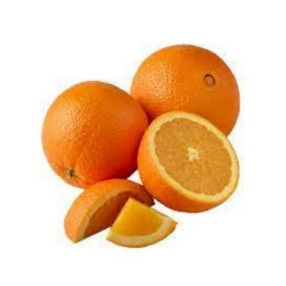

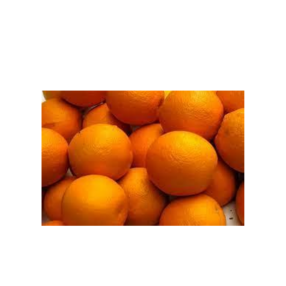

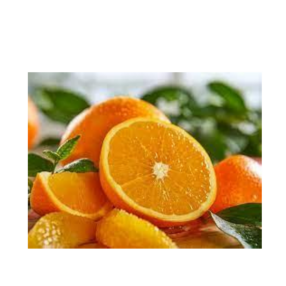

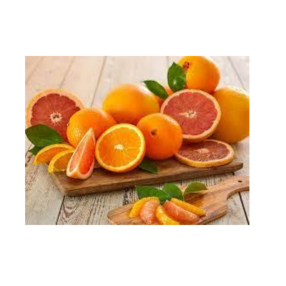

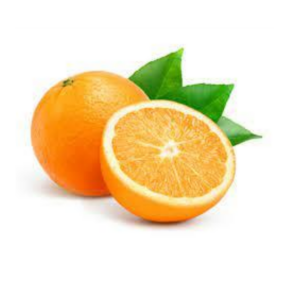

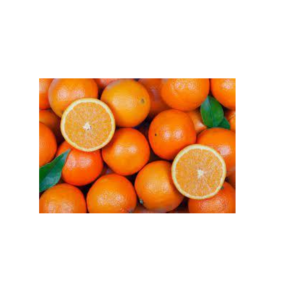

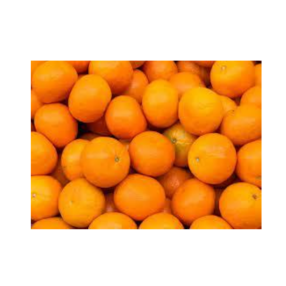

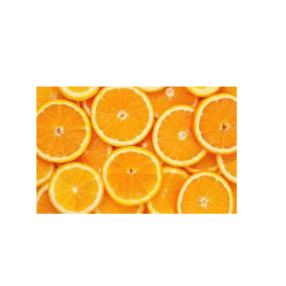

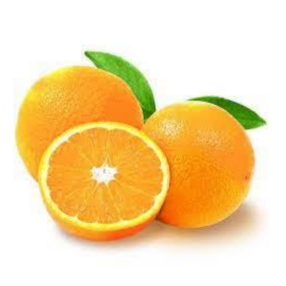

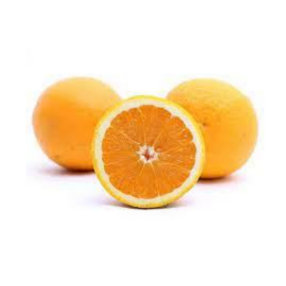

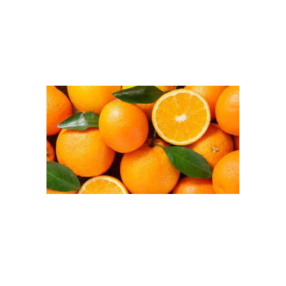

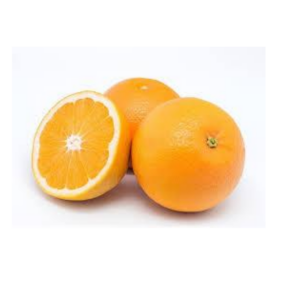

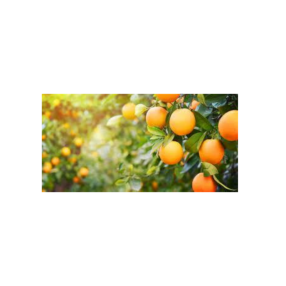

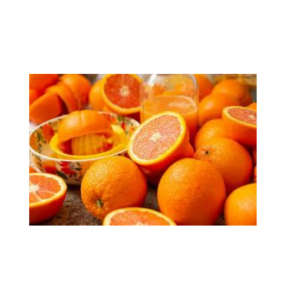

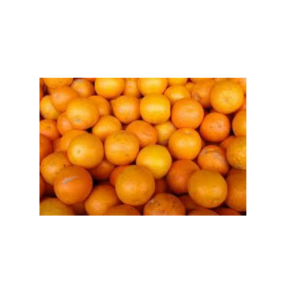

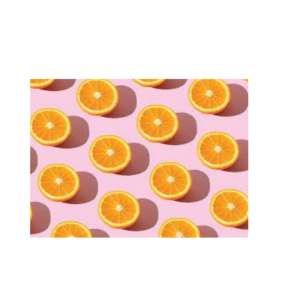

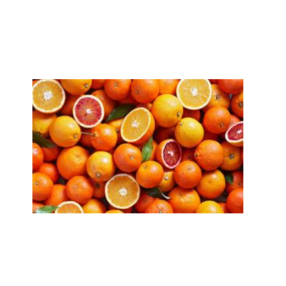

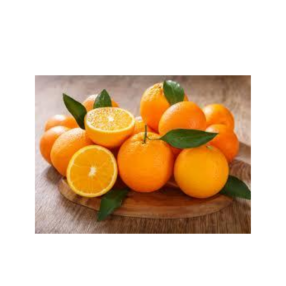

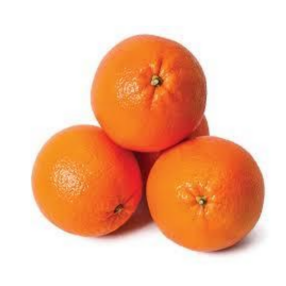

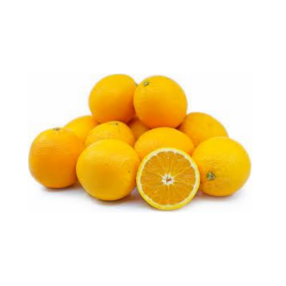

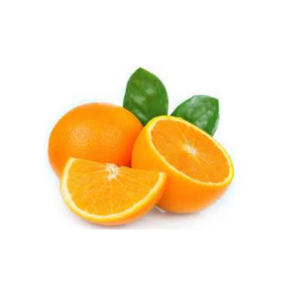

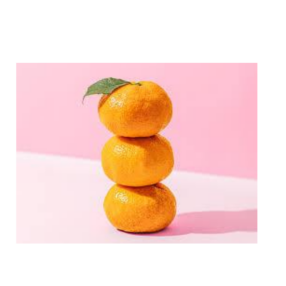

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

In [ ]:
model(images)

tensor([[-2.0366, -0.5104, -5.5053,  ...,  0.3275,  6.4257,  3.1463],
        [-0.7444,  1.4047, -3.3834,  ...,  4.6492,  6.0546,  0.9449],
        [ 1.4432,  3.1050, -3.0740,  ...,  5.6051,  6.7020,  0.0219],
        ...,
        [-5.0586, -0.9902, -7.4863,  ...,  2.6993, 10.9614, -0.7376],
        [-5.2403,  3.4188, -7.0482,  ..., -1.4527,  9.3261, -0.1643],
        [-3.8241,  1.1711, -6.3762,  ..., -0.9527,  6.9318,  1.0896]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

pomegranate
Granny Smith
Granny Smith
fig
crate
screen, CRT screen
matchstick
Granny Smith
hair slide
Granny Smith
strawberry
bell pepper
Granny Smith
honeycomb
ice cream, icecream
pomegranate
strawberry
honeycomb
Band Aid
Granny Smith
pomegranate
matchstick
crate
hair slide
Band Aid
orange
ping-pong ball
pill bottle
orange
pill bottle
orange
orange
orange
pill bottle
ping-pong ball
honeycomb
orange
orange
pill bottle
lemon
hair slide
orange
ping-pong ball
honeycomb
ping-pong ball
orange
orange
pill bottle
bell pepper
pill bottle


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

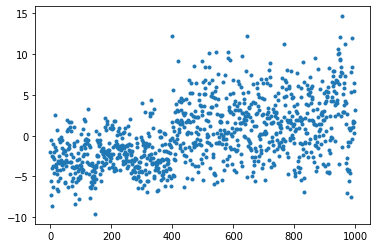

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

array([-2.0365536 , -0.51036924, -5.5053325 , -7.263652  , -3.9325614 ,
       -2.5480533 , -8.627087  , -3.7803087 , -1.0138297 , -6.267915  ,
       -2.6753426 , -4.601854  , -2.0077727 , -2.8345134 , -3.7724354 ,
       -1.4100803 ,  2.5776048 , -3.5105195 , -1.7405138 , -3.8968291 ,
       -6.527268  , -4.6637325 , -4.193991  ,  0.70429486, -6.839483  ,
       -5.6191745 , -3.1158395 , -2.4762418 , -3.3550808 , -0.3727262 ,
       -5.1886573 , -0.7462139 , -0.5088199 , -4.220667  , -2.9704149 ,
       -3.358032  , -0.18207398, -0.52265334, -3.553456  , -1.5323324 ,
       -2.1550677 , -3.1998286 , -4.0373096 , -3.3730636 , -3.252506  ,
       -1.7142318 , -1.8964459 , -1.9337387 , -5.6889224 , -5.7718177 ,
       -3.737916  , -3.0109017 , -2.4251916 , -0.920701  ,  0.6123022 ,
       -3.2803495 ,  1.8662972 , -1.6408594 , -6.314188  ,  0.840966  ,
        1.6555679 , -1.1555264 , -1.5485487 ,  1.0206888 , -3.287092  ,
       -4.691053  ,  1.6642555 , -2.2876465 ,  0.52261585, -3.24

In [ ]:
np.argmax(X[0])

957

In [ ]:
labels[957]

'pomegranate'

(array([  7.,  76., 234., 241., 190., 129.,  79.,  31.,  12.,   1.]),
 array([-9.604333  , -7.1776233 , -4.750914  , -2.3242044 ,  0.10250492,
         2.5292144 ,  4.955924  ,  7.382633  ,  9.809342  , 12.2360525 ,
        14.662762  ], dtype=float32),
 <a list of 10 Patch objects>)

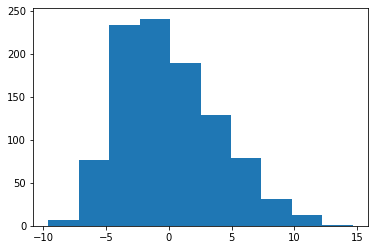

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-3-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
